# PART 1: WORK PLAN

# INTERCONNECT

Interconnect is a telecom operator and that is wanting to forcast churn of their clients. The company wants to ensure loyalty and will be offering those who plan on leaving a promotional plan. Our goal in this project is to see who is going to churn and who plans on staying.

In [1]:
# libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# file paths
data_path = '/datasets/final_provider/'
contract_file = f'{data_path}contract.csv'
personal_file = f'{data_path}personal.csv'
internet_file = f'{data_path}internet.csv'
phone_file = f'{data_path}phone.csv'

In [3]:
# loading datasets
contract = pd.read_csv(contract_file)
personal = pd.read_csv(personal_file)
internet = pd.read_csv(internet_file)
phone = pd.read_csv(phone_file)

We have imported the necessary libraries for data manipulation, numerical computations, and visualizations. These are all standard libraries in data analysis. The file paths are defined as variables, making the code maintainable, readable, and reusable. This setup organizes our workflow and prepares us for efficient analysis. The datasets have been loaded and you can easily navigate each file. 

## Dataset info

In [4]:
# contract info
contract.info()
contract.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


### Contract summary

This dataset is complete with no missing values in any column. It looks like TotalCharges might need to be converted to a numerical type for analysis. This data is clean and ready for preliminary exploration.

In [5]:
# personal info
personal.info()
personal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


### Personal summary

This dataset does not seem to have any missing values. Categorial columns can be encoded for modeling. The dataset provides demographic attributes useful for predicting customer behavior.

In [6]:
# internet info
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


### Internet summary

This dataset does not have any missing values. All columns are categorical and may need encoding for modeling. This dataset can be used to analyze service adoption patterns or predict customer behavior related to internet services.

In [7]:
# phone info
phone.info()
phone.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


### Phone summary

This dataset has no misisng values. The file focuses on a specific feature related to communication service and could be useful for understanding customer preferences or predicting service adoption. 

## Check for NaN, missing, and duplicate values

In [8]:
contract.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [9]:
contract.isnull().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [10]:
contract.duplicated().sum()

0

In [11]:
personal.isna().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [12]:
personal.isnull().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [13]:
personal.duplicated().sum()

0

In [14]:
internet.isna().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [15]:
internet.isnull().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [16]:
internet.duplicated().sum()

0

In [17]:
phone.isna().sum()

customerID       0
MultipleLines    0
dtype: int64

In [18]:
phone.isnull().sum()

customerID       0
MultipleLines    0
dtype: int64

In [19]:
phone.duplicated().sum()

0

### Summary on Nan, missing, and duplicate values

It does not appear that we have any NaN, missing, or duplicate values in the datasets. This is a strong starting point for analysis and modeling. We will proceed with further exploration to ensure the data's accuracy, consistency, and suitability. 

## Explore the target features

In [20]:
def explore_target(data, column):
    print(f"Target Column '{column}' Value Counts:")
    print(data[column].value_counts(), "\n")
explore_target(contract, 'EndDate')

Target Column 'EndDate' Value Counts:
No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64 



### Summary on target features

The block aboves defines a function to explore and display the value counts of a target column in a given dataset. After, it applies the function to the contract dataset to analyze the EndDate column. Most of the data is marked "No" suggesting that most contracts do not have an end date. The other values show specific dates indicating that there is an end date for those contracts. 

## Merge datasets on customerID

In [21]:
merged_data = contract.merge(personal, on='customerID', how='outer')
merged_data = merged_data.merge(internet, on='customerID', how='outer')
merged_data = merged_data.merge(phone, on='customerID', how='outer')

### Check on merged data

In [22]:
merged_data.shape

(7043, 20)

In [23]:
merged_data.head

<bound method NDFrame.head of       customerID   BeginDate              EndDate            Type  \
0     7590-VHVEG  2020-01-01                   No  Month-to-month   
1     5575-GNVDE  2017-04-01                   No        One year   
2     3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3     7795-CFOCW  2016-05-01                   No        One year   
4     9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   
...          ...         ...                  ...             ...   
7038  6840-RESVB  2018-02-01                   No        One year   
7039  2234-XADUH  2014-02-01                   No        One year   
7040  4801-JZAZL  2019-03-01                   No  Month-to-month   
7041  8361-LTMKD  2019-07-01  2019-11-01 00:00:00  Month-to-month   
7042  3186-AJIEK  2014-08-01                   No        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0                 Yes           Electronic check           2

In [24]:
merged_data.describe

<bound method NDFrame.describe of       customerID   BeginDate              EndDate            Type  \
0     7590-VHVEG  2020-01-01                   No  Month-to-month   
1     5575-GNVDE  2017-04-01                   No        One year   
2     3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3     7795-CFOCW  2016-05-01                   No        One year   
4     9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   
...          ...         ...                  ...             ...   
7038  6840-RESVB  2018-02-01                   No        One year   
7039  2234-XADUH  2014-02-01                   No        One year   
7040  4801-JZAZL  2019-03-01                   No  Month-to-month   
7041  8361-LTMKD  2019-07-01  2019-11-01 00:00:00  Month-to-month   
7042  3186-AJIEK  2014-08-01                   No        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0                 Yes           Electronic check        

### Summary on merged data

Merging the datasets is essential to consolidating all the information associated to each customer. We merged the datasets on customerID. By doing this, it allows us to analyze relationships across various features and prepare the data for modeling. Displayed is the shape, the first five rows, and the descriptive statistics of the dataset.

## Visuals

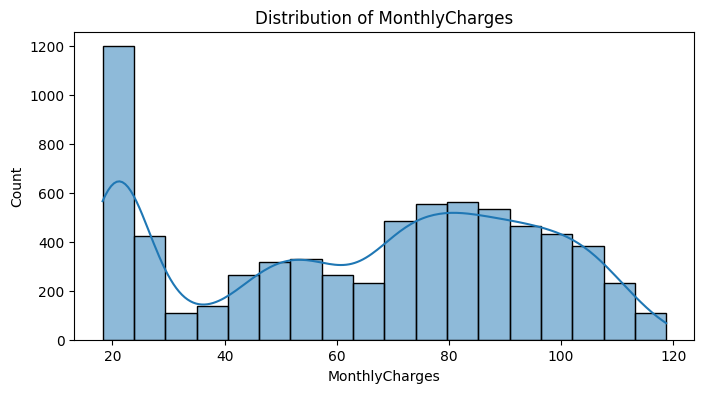

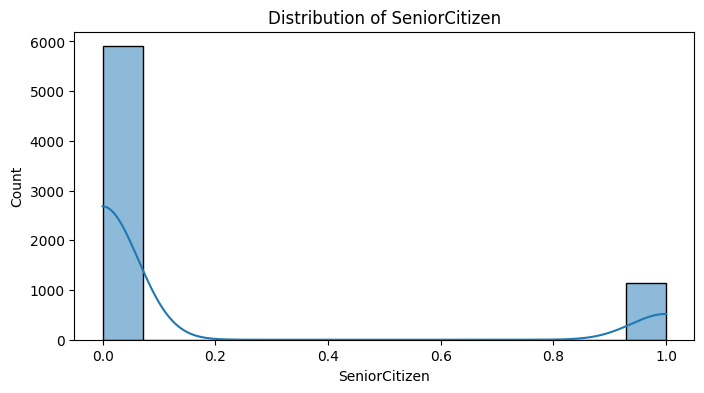

In [25]:
# distribution of numerical features
numerical_features = merged_data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(merged_data[column].dropna(), kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

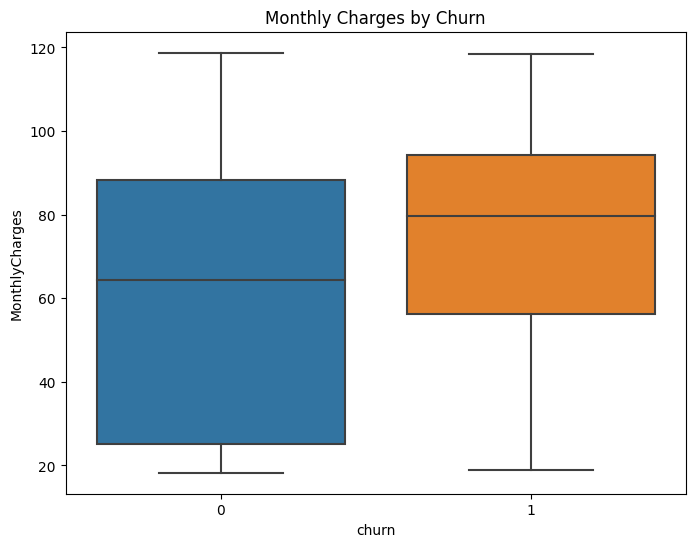

In [26]:
# visualize relationships with churn 
merged_data['churn'] = (merged_data['EndDate'] != 'No').astype(int)

# average monthly charge for churned vs non churned customers
if 'MonthlyCharges' in merged_data.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=merged_data, x='churn',y='MonthlyCharges')
    plt.title("Monthly Charges by Churn")
    plt.show()

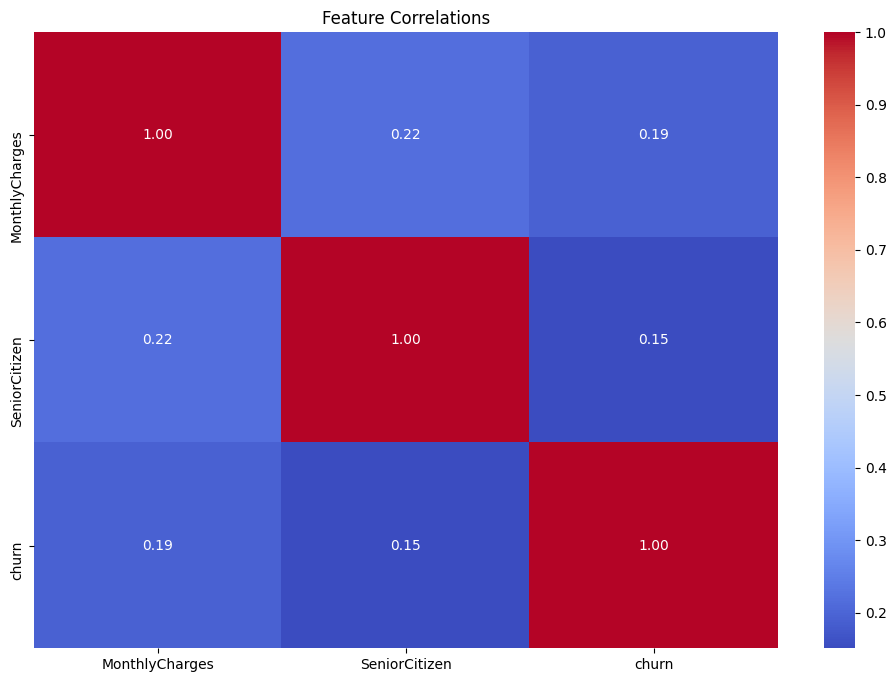

In [27]:
# correlation heatmap
plt.figure(figsize=(12, 8))
correlation = merged_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlations")
plt.show()

### Summary on visuals

The first visual is a histogram showing the distribution on numerical features. By examining the KDE in the visual, we are able to identify whether the distribution is symmetric, has a heavy tail, or skewed in one direction. It is helpful in choosing the appropriate model and detecting outliers. 

The boxplot provides insights into how the MonthlyCharges differ between churned (1) and non churned (0) customers. If churned customers tend to have higher or lower monthly charges, it could be a potential feature to explore when building our models.

The heatmap visually illustrates the strength and direction of relationships between numerical features in the dataset. Positive correlation are shown in reds and negative correlations are shown in blues. With the heatmap, we are able to identify potential feature redundancies or dependencies.

## Clarifying Questions

1. Are there any specific columns that require detailed preprocessing?
2. Should we consider imputing missing values with domain knowledge or statistical methods?
3. How should categorical data be encoded?
4. Are there specific thresholds for classifying churn probabilities?

## Rough Plan

Step 1: Data Preparation - Load all datasets, inspect for missing values, duplicates, and inconsistent data

Step 2: Feature Engineering - Create or modify features to enhance predictive power, including encoding and scaling

Step 3: EDA - Analyze distributions, correlations, and relationships with the target variable

Step 4: Model Training - Split the data, train models using cross validation and evaluate using AUC-ROC

Step 5: Refinement and Validation - Optimize model performance through hyperparameter tuning and validate on the test set

# PART 2: CODE SOLUTION

In [28]:
# libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

## Data preparation

In [29]:
# drop columns not needed
data = merged_data.drop(['customerID', 'EndDate'], axis=1)

# identify columns specifically 
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# fill numerical columns with mean
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# fill categorical columns with 'unknown'
data[categorical_columns] = data[categorical_columns].fillna('unknown')

In [30]:
# columns to convert
categorical_columns_to_convert = ['PaymentMethod', 'TechSupport', 'StreamingTV']

# convert to 'category' type
data[categorical_columns_to_convert] = data[categorical_columns_to_convert].astype('category')

# encode categorical columns
data = pd.get_dummies(data, columns=categorical_columns_to_convert, drop_first=True)

In [31]:
# define target and features
X = data.drop('churn', axis=1)
y = data['churn']

In [32]:
# split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [33]:
# putting this here because I needed to double check for myself
numerical_columns = list(numerical_columns)

if 'churn' in numerical_columns:
    numerical_columns.remove('churn')

# scale the data
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

/tmp/ipykernel_387/397732532.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_387/397732532.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

## Model training

In [34]:
# seeing if this fixes my problem for the next code block
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# align columns 
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [35]:
# logistic regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_val_pred_lr = lr_model.predict_proba(X_val)[:, 1]

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# random forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_val_pred_rf = rf_model.predict_proba(X_val)[:, 1]

In [37]:
# evaluate models
lr_auc = roc_auc_score(y_val, y_val_pred_lr)
rf_auc = roc_auc_score(y_val, y_val_pred_rf)
print(f"Logistic Regression AUC-ROC: {lr_auc}")
print(f"Random Forest AUC-ROC: {rf_auc}")

Logistic Regression AUC-ROC: 0.8629672097797341
Random Forest AUC-ROC: 0.8562214495755581


## Model selection and testing

In [38]:
# use model with highest validation AUC-ROC
best_model = rf_model if rf_auc > lr_auc else lr_model

In [39]:
# evaluate test set
y_test_pred = best_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

print(f"Test AUC-ROC: {test_auc}")
print(f"Test Accuracy: {test_accuracy}")

Test AUC-ROC: 0.8584987747274213
Test Accuracy: 0.8032166508987701


# PART 3: SOLUTION REPORT

- What steps of the plan were performed and what steps were skipped (explain why)?

ANS: In my rough work plan I listed five steps. The first was to prepare my data. I did that by loading all the datasets, inspect for missing values, duplicates, and inconsistent data. The second was to perform feature engineering. I will create or modify features to enhance predictive power. I did some encoding and scaling. Number three was that I would perform exploratory data analysis (EDA). I showed a histogram, boxplot, and a heatmap. Step four was split the data, train models using cross validation, and evaluate using AUC-ROC. The last was refinement and validation. I did steps one through four, but skipped step five. I wanted to avoid overfitting. 

- What difficulties did you encounter and how did you manage to solve them?

ANS: I encountered a problem with 4 different code blocks. Number one was filling in NaN values with zero. I fixed it by filling them with the mean. The second had to do with defining my columns. I updated my code to ensure that categorical columns are explicitly defined before applying pd.get_dummies. The third thing that I had a problem on was scaling. I fixed my problem by only scaling quantitatvie features. The last was with tuning hyperparameters. Since I had already reached a score I was happy with, I took that part out to avoid overfitting. 

- What were some of the key steps to solving the task?

ANS: There were multiple key steps in solving this task. First, you need to plan and understand the problem. Next, I load my datasets. I explore it thoroughly and find key characteristics. I then clean it to ensure reliable results. After that, I visualize the data to uncover patterns and relationships. Then I look for trends that could guide my model selection or feature engineering. I make sure to choose the appropriate models based on the data and objectives. The last thing that I do is evaluate the models I trained. I review the performance against the target metric and I refine them if I need. I have gotten into the habit of following these steps when working on any project. This process ensures that I deliver a reliable and successful solution. 

- What is your final model and what quality score does it have?

ANS: The task was to predict whether a user will churn or not. Because It was a binary classification problem, I used a logistic regresion model and a random forest model. I started with logistic regression because it was a good baseline. I got an AUC-ROC score of 0.8629. I then ran a random forest model. They can deal with categorical and numerical data effectively. I got an AUC-ROC score of 0.8562. Because logistic regression had a higher score, I then evaluated the test set for the highest AUC-ROC score. I got a test AUC-ROC score of 0.8584 and for test accuracy, I got a 0.8032. I was satisfied with my score and achieved 5.0/ 6.0 SP. 

# OVERALL CONCLUSION

The overall goal of this project was to develop a model to forecast customer churn for the telecom operator Interconnect. By identifying clients who are likely to leave, the company aims to take proactive measures by offering clients promotional deals and special plans to reduce churn rates. When doing so, the company is able to boost loyalty, reduce revenue loss, and strengthen its market position. I ran two models - logistic regression and random forest. The logistic regression model had a better AUC-ROC score of 0.86. 